In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
whole_df = pd.read_csv("results/mimic.csv")
datasets = ["mimic_los-density", "mimic_los-recip-density-sq"]
whole_df

,dataset,n_train,d,p_train,method,gamma,loss,model_class,use_train_weights,seed,...,test_loss,test_loss_se,test_mse,test_mse_se,heldout_train_ru_loss,heldout_train_ru_loss_se,heldout_train_mse,heldout_train_mse_se,heldout_train_loss,heldout_train_loss_se
0,mimic_los-density,7000,2,0.2,joint_ru_regression,4.0,squared_loss,neural_network,False,0,...,4.425028,0.120483,4.110063,0.111908,3.123143,0.058000,0.908628,0.014405,0.978258,0.015509
1,mimic_los-density,7000,2,0.2,joint_ru_regression,8.0,squared_loss,neural_network,False,0,...,4.208942,0.115135,3.909356,0.106939,5.569264,0.110125,0.899161,0.013803,0.968066,0.014861
2,mimic_los-density,7000,2,0.2,ru_regression,16.0,squared_loss,neural_network,False,0,...,3.602482,0.090158,3.346063,0.083740,6.776169,0.126672,1.382343,0.021800,1.488276,0.023471
3,mimic_los-density,7000,2,0.2,ru_regression,1.0,squared_loss,neural_network,False,0,...,4.456802,0.121274,4.139575,0.112642,0.956988,0.015447,0.888871,0.014348,0.956988,0.015447
4,mimic_los-recip-density-sq,7000,2,0.2,joint_ru_regression,2.0,squared_loss,neural_network,False,0,...,5.346485,0.034748,23.211996,0.150860,1.927557,0.078703,4.545727,0.175382,1.047030,0.040396
5,mimic_los-recip-density-sq,7000,2,0.2,joint_ru_regression,16.0,squared_loss,neural_network,False,0,...,5.239465,0.034688,22.747366,0.150600,10.339084,0.539916,4.594012,0.171557,1.058152,0.039515
6,mimic_los-density,7000,2,0.2,joint_ru_regression,16.0,squared_loss,neural_network,False,0,...,4.261436,0.116555,3.958115,0.108259,10.504280,0.220228,0.899042,0.013828,0.967938,0.014887
7,mimic_los-recip-density-sq,7000,2,0.2,joint_ru_regression,1.0,squared_loss,neural_network,False,0,...,5.971721,0.033759,25.926483,0.146567,0.967195,0.026986,4.199117,0.117162,0.967195,0.026986
8,mimic_los-density,7000,2,0.2,joint_ru_regression,2.0,squared_loss,neural_network,False,0,...,4.252608,0.116075,3.949915,0.107813,1.772746,0.028993,0.914362,0.014053,0.984432,0.015129
9,mimic_los-density,7000,2,0.2,joint_ru_regression,1.0,squared_loss,neural_network,False,0,...,4.456802,0.121274,4.139575,0.112642,0.956988,0.015447,0.888871,0.014348,0.956988,0.015447


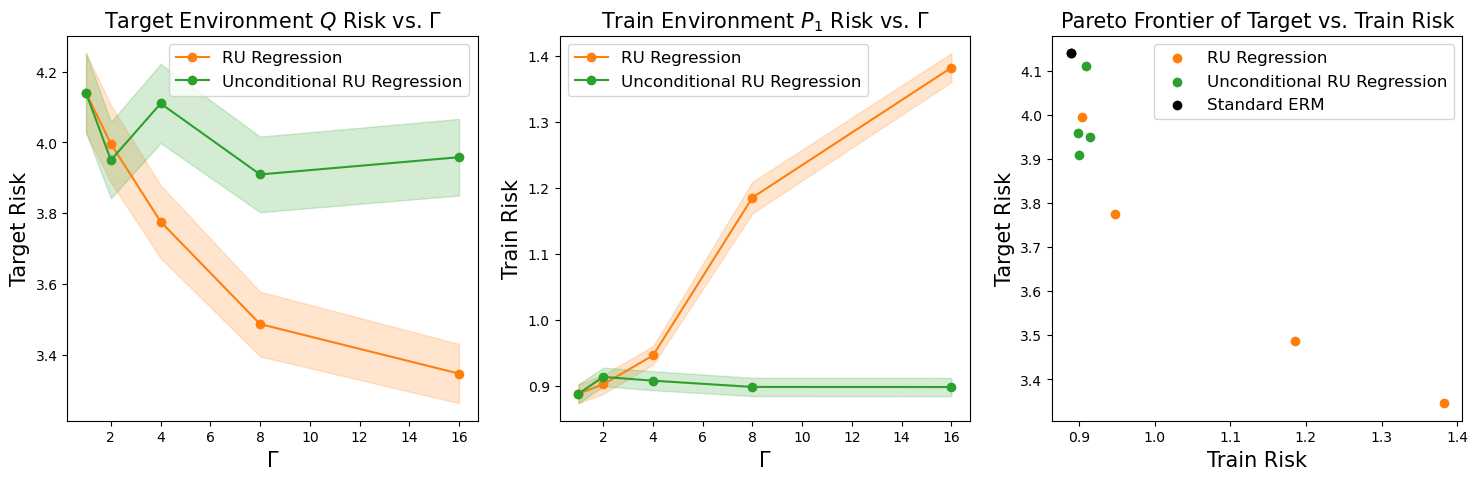

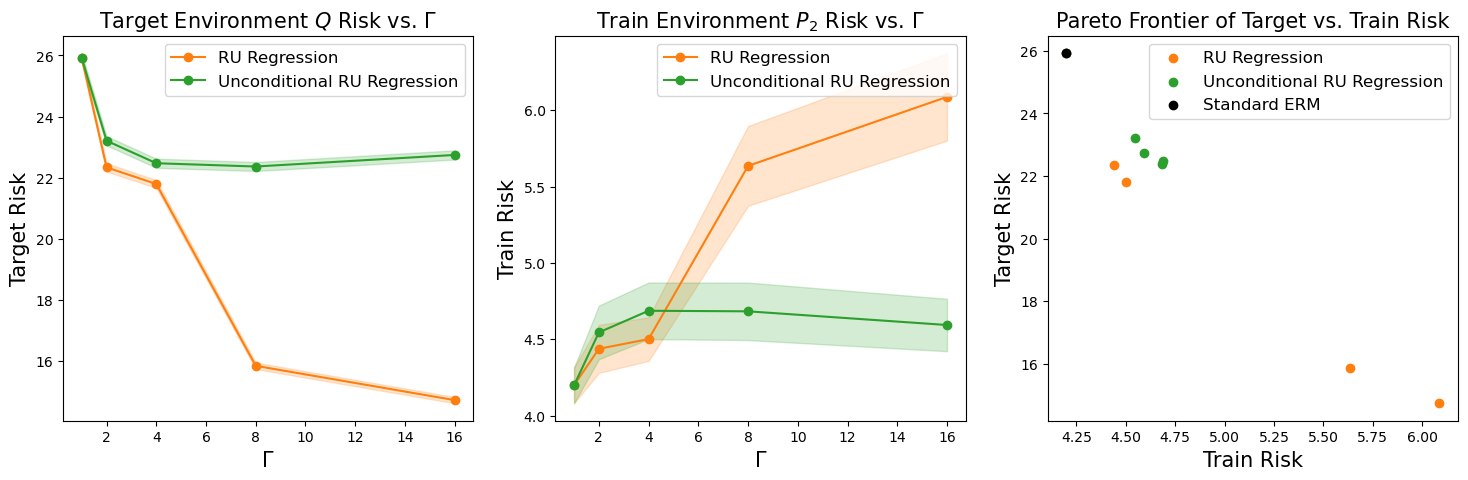

In [3]:
for dataset in datasets:
    df = whole_df[whole_df.dataset == dataset]

    df = df.sort_values("gamma")
    df_cond = df[(df.method == "ru_regression") & (df.loss == "squared_loss") & (df.use_train_weights==False)]
    df_joint = df[(df.method == "joint_ru_regression") & (df.loss == "squared_loss")]
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    l = dataset.split("_")
    weight_type_mapping = {"los-density": r"$P_{1}$", 
                           "los-recip-density-sq": r"$P_{2}$",
                          }
    weight_type = weight_type_mapping[l[1]]
    labels = ["test_mse", "heldout_train_mse"]
    for i in range(2):
        ax[i].plot(df_cond["gamma"], df_cond[labels[i]], 
                   label="RU Regression", c="tab:orange", marker="o")
        ax[i].plot(df_joint["gamma"], df_joint[labels[i]], label="Unconditional RU Regression", c="tab:green", marker="o")
        ax[i].fill_between(df_cond["gamma"], df_cond[labels[i]]- df_cond[labels[i] + "_se"], 
                           df_cond[labels[i]] + df_cond[labels[i] + "_se"], alpha=0.2, color="tab:orange")
        ax[i].fill_between(df_joint["gamma"], df_joint[labels[i]]- df_joint[labels[i] + "_se"], 
                           df_joint[labels[i]] + df_joint[labels[i] + "_se"], alpha=0.2, color="tab:green")
        
    ax[2].scatter(df_cond["heldout_train_mse"], df_cond["test_mse"],
                   label="RU Regression", c="tab:orange", marker="o")
    ax[2].scatter(df_joint["heldout_train_mse"], df_joint["test_mse"],
                   label="Unconditional RU Regression", c="tab:green", marker="o")
    ax[2].scatter([df_joint["heldout_train_mse"].iloc[0]], [df_joint["test_mse"].iloc[0]], label="Standard ERM",
                  c="black", marker="o")

    fontsize=15
    ax[1].set_ylabel("Train Risk", fontsize=fontsize)
    ax[1].set_title("Train Environment " + weight_type + " Risk vs. $\Gamma$", fontsize=fontsize)
    
    ax[2].set_ylabel("Target Risk", fontsize=fontsize)
    ax[2].legend(fontsize=12)
    ax[2].set_xlabel("Train Risk", fontsize=fontsize)
    ax[2].set_title("Pareto Frontier of Target vs. Train Risk", fontsize=fontsize)
    
    ax[0].set_title("Target Environment " + r"$Q$" + " Risk vs. $\Gamma$", fontsize=fontsize)
    ax[0].set_ylabel("Target Risk", fontsize=fontsize)

    for i in range(2):
        ax[i].legend(fontsize=12)
        ax[i].set_xlabel("$\Gamma$", fontsize=fontsize)

    #plt.suptitle("$P$:" " Train Environment Generated by " + mapping[weight_type] + ", $Q:$" + " MIMIC-III" )
    plt.savefig("figs/new_mimic_{}.pdf".format(weight_type), bbox_inches="tight")
    plt.show()

### 